# Исследование игрового рынка для интернет-магазина «Стримчик» 
<br>

## **Цель проекта:** 
Исследовать статистику по продажам и оценкам игр для выявления определяющих успешность игры закономерностей для определения потенциально популярных продуктов и планирования рекламных компаний на 2017 год. <br>

<br>

## **Выборка:**
Из открытых источников доступны исторические данные до 2016 г. о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

## **План исследования**<br>
<br>
1) Загрузить и изучить данные. <br>
2) Выполнить предобработку данных. Найти и обработать пропуски и дубли в датафрейме. Проверить правильность типов данных. Рассчитать суммарные продажи.<br>
3) Провести исследовательский анализ данных: <br>
    - Посмотреть, сколько игр выпускалось в разные годы.<br>
    - Посмотрете, как менялись продажи по платформам. <br>
    - Узнать какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.<br>
    - Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. <br>
    - Посмотреть на общее распределение игр по жанрам. <br>
4) Составить портрет пользователя каждого региона<br>
5) Провести проверку ряда гипотез. 

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
rows_start = len(df.axes[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датафрейме 16715 строк. <br> 
Сохраним это значение в переменную rows_start для сравнения с датафреймом после обработки. <br>
Обратим внимание на то, что в столбце Year_of_Release с годом выпуска стоит тип данных float64, нужно будет заменить его на целочисленный int. <br>
В столбце User_Score c оценками пользователей стоит тип данных object. Нужно будет заменить его на float. <br>
Видим присутствие большого колличества пропусков. Обработаем их на этапе предобработки данных

In [5]:
# тип данных в User_Score - object. Это значит колонка может содержать кроме цифровых значений и NaN что-то ещё. 
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Действительно есть значение tbd. Что является абревиатурой к - To be determined. Что значит 'рейтинг предстоит определить'.

## Предобработка данных


In [6]:
# Заменим названия столбцов (приведём их к нижнему регистру)
df.columns = map(str.lower, df.columns)
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# проверим датафрейм на полные дубликаты
df.duplicated().sum()

0

In [8]:
# проверим колличество пропусков в каждом столбце и решим что будем делать с ними
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удалим пропуски в столбце "name" с названиями игр. Они могли образоваться в связи с технической ошибкой. Или у игры на момент формирования датасета не было названия.<br>
Удалим пропуски в столбце "year_of_release". Нам будет нужна оценка игр по годам выпуска и это будет невозможно сделать с пропусками. Пропуск мог возникнуть или по техническим причинам или дата выхода игры не определена <br>
Удалим пропуски в столбце 'genre'. Пропуски могли возникнуть или по технической причине или потому что значения забыли заполнить или игру выпустили, но не смогли определиться с жанром.<br> 
В целях дальнешйшего поиска дубликатов отформатируем названия, чтобы гарантированно каждое слово начиналось с большой буквы. 

In [9]:
df.dropna(subset=['name', 'year_of_release', 'genre'], inplace = True)  # удаляем пропуски
df['name'] = df['name'].str.title()
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [10]:
# После удаления пропусков можем изменить тип данных в столбце 'year_of_release' на целочисленный
df['year_of_release'] = df['year_of_release'].astype('int64')

In [11]:
# проверим датафрейм на неявные дубликаты по столбцам name, platform и year_of_release
df[df.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden Nfl 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [12]:
# удалим дубликат
df = df.drop([16230]).reset_index(drop=True)
df[df.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [13]:
# посмотрим ещё на значения, которые присутствуют в колонке rating

df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Здесь есть неявный дубликат в виде устаревшей категории K-A, которая после 1998 года была переименована в Е10+. Так как это более актуальный аналог, то заменим все значения К-А на Е10+

In [14]:
df['rating'] = df['rating'].replace('K-A', 'E10+')

В столбцах critic_score, user_score и rating есть пропущенные значение. Их колличество велико и удалять эти строки мы не можем. Чтобы избавиться от пропусков, но не терять данные можно поставить значение '-1'. Так мы не теряем данные, и можем отфильтровать лишнее при анализе. <br>
Также поступим и со значением 'tbd' в столбце user_score, так как в данном случае рейтинг тоже отсутствует. 


In [15]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].replace('tbd', -1)
df['user_score'] = df['user_score'].fillna(-1)
df['rating'] = df['rating'].fillna(-1)

df[df['user_score'] == 'tbd']['user_score'].count()

In [16]:
# После удаления пропусков можем изменить тип данных в столбце 'user_score' на float
df['user_score'] = df['user_score'].astype('float')

Нужно добавить столбец sum_sales с суммарными продажами по всем регионам:

In [17]:
# создаём столбец sum_sales с суммарными продажами по всем регионам
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [18]:
df.info()   # проверим итоговый датафрейм и убедимся в отсутствии пропусков и правильности типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  sum_sales        16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [19]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38


In [20]:
print('На этапе предобработки данных потеряно:', rows_start - (len(df.axes[0])), 'стр., что составляет', round(((len(df.axes[0]))/rows_start), 2), '% от изначального датафрейма')

На этапе предобработки данных потеряно: 272 стр., что составляет 0.98 % от изначального датафрейма


- Мы проверили датафрейм на дубликаты. Полных дубликатов нет. 
- Все названия столбцов привели к одинаковому виду с нижней строки
- Нашли пропуски в столбцах. Строки с пропусками в 'name', 'year_of_release', 'genre' были удалены. 
- Пропущенные значения в critic_score, user_score и rating были заменены на '-1' для возможности дальнейшего анализа
- Всего была потеряна 272 строки, это менее 1 процента от всего датафреймма. Этот результат нас устраивает.
- Тип данных в столбце year_of_release был заменён на int64, так как года - это целочисленные значения. 
- Тип данных в столбце user_score был заменён на float, так как оценки имеют десятичные значения. 
- В столбце rating заменили все значения 'K-A' на 'E10+', так как это одно и тоже, но в современной версии рейтинга. 
- Был добавлен столбец sum_sales с суммарными продажами по всем регионам


## Исследовательский анализ данных

### **Проверим сколько игр выпускалось в разные годы**

In [21]:
# сгруппируем колличество выпущенных игр по годам
count_games = df.groupby(['year_of_release'])['name'].count()
count_games.describe()

count      37.000000
mean      444.405405
std       451.591535
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: name, dtype: float64

<AxesSubplot:title={'center':'Количество выпущенных игр по годам'}, xlabel='Год выпуска', ylabel='Количество игр'>

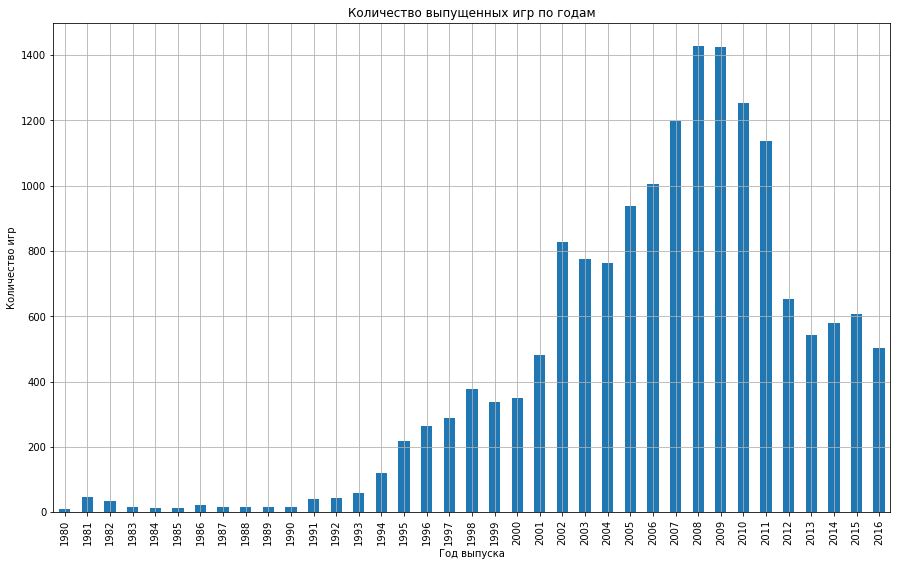

In [22]:
# построим гистограмму
count_games.plot(
    kind='bar', figsize=(15,9), grid=True,
    title='Количество выпущенных игр по годам',
    xlabel= 'Год выпуска', ylabel= 'Количество игр'
)

Количество выпущенных игр росло, начиная с 1990 года и по 2008 год. <br>
С 1980 по 2016 в среднем каждый год выпускалось около 444 игр. <br> 
Во внимание мы взяли среднее медианное в связи с большим разбросом данных по годам. <br>
Самым урожайным на игры годом был 2008 с 1427 играми. <br> 
После этого пика началось планомерное снижение колличества выпускаемых игр. <br>
Возможно повышение требовательности геймеров к качественным играм повысило бюджеты игр и время на их разработку, что отразилось на колличестве выпускаемых студиями игр.

### **Как менялись продажи по платформам**

In [23]:
platform_sum_sales = df.groupby(['platform'])['sum_sales'].sum().sort_values(ascending=False)

platform_sum_sales

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

<AxesSubplot:title={'center':'Суммарные продажи по платформам'}, xlabel='Платформа', ylabel='Колличество проданных копий (млн)'>

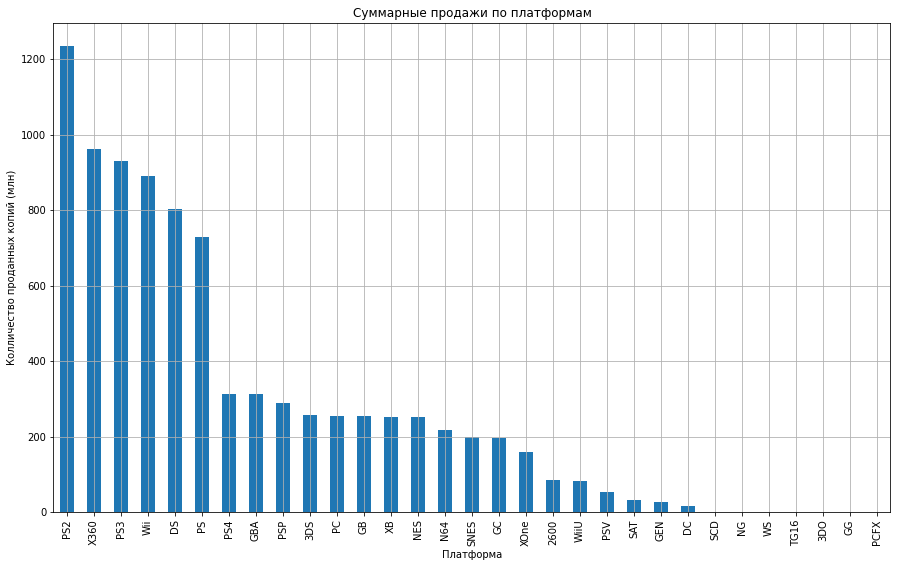

In [24]:
# построим гистограмму
platform_sum_sales.plot(
    kind='bar', figsize=(15,9), grid=True,
    title='Суммарные продажи по платформам',
    xlabel= 'Платформа', ylabel= 'Колличество проданных копий (млн)'
)

Данные показывают нам 6 явных лидеров среди платформ. 
Создадим цикл и построим распределение продаж по годам по каждой из этих платформ. 

Распределение продаж игр по годам на платформе: PS2


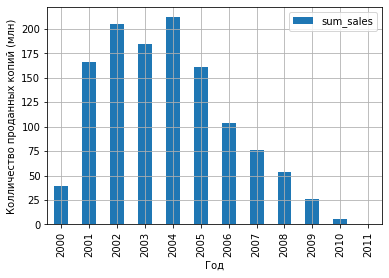

Распределение продаж игр по годам на платформе: X360


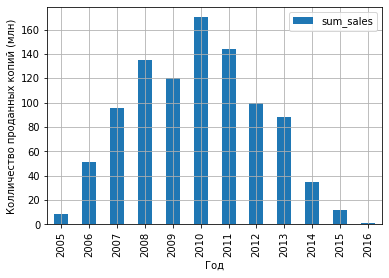

Распределение продаж игр по годам на платформе: PS3


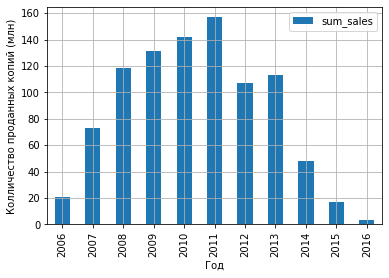

Распределение продаж игр по годам на платформе: Wii


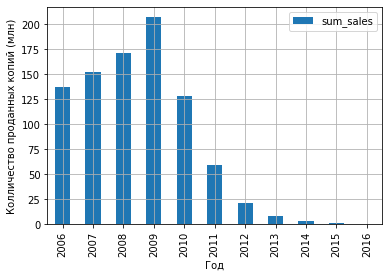

Распределение продаж игр по годам на платформе: DS


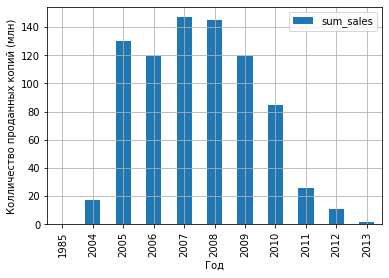

Распределение продаж игр по годам на платформе: PS


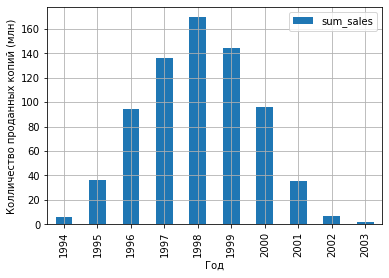

In [25]:
for i in platform_sum_sales.index[:6]:
    print('Распределение продаж игр по годам на платформе:', i)
    (df
     .query('platform == @i')
     .pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
     .plot(kind='bar', xlabel= 'Год', ylabel= 'Колличество проданных копий (млн)', grid=True)
    )
    plt.show()

**Можно выделить топ платформ по продажам игр:**<br><br>
Будем считать годами с топ продажами при количестве проданных копий свыше 100 млн. <br>
- PlayStation 2 (топ продаж с 2001 по 2006 год)
- Xbox360 (топ продаж с 2008 по 2012 год)
- PlayStation 3 (топ продаж с 2008 по 2013 год)
- Wii Nintendo (топ продаж с 2006 по 2010 год)
- Nintendo DS (топ продаж с 2005 по 2009 год)
- PlayStation (топ продаж с 1997 по 1999 год)
<br>

Наибольшее количество продаж было у игр для PS2. В момент выхода первых игр в 2000 году это был прорыв в игровых технологиях, люди с охотой покупали новые приставки и игры к ним. <br>
У каждой из платформ можно заметить жизненный цикл, в виде резкого взлёта продаж игр, далее более плавный рост или удержание прежних уровней на протяжении от 2 до 5 лет и затем спад продаж до нулевого уровня. В среднем срок жизни у всех этих платформ около 10 лет. Причём все 6 платформ-лидеров продаж уже не являются актуальными. <br>


**Возьмём данные за соответствующий актуальный период.**

Игровая индустрия быстро идёт вперед, игры достаточно быстро перестают быть актуальными, поэтому для анализа данных мы будем считать актуальными данные за 3 года, а именно 2014, 2015 и 2016 года. 
Создадим новый датафрейм, взяв данные только за эти три года.

In [26]:
df_actual = df.query('year_of_release >= 2014')
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call Of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,-1,11.68
77,Fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,-1,7.98


In [27]:
len(df_actual)

1689

 ### Определим какие платформы лидируют по продажам, растут или падают? 

<AxesSubplot:title={'center':'Суммарные продажи по платформам за 2014-2016 годы'}, xlabel='Платформа', ylabel='Колличество проданных копий (млн)'>

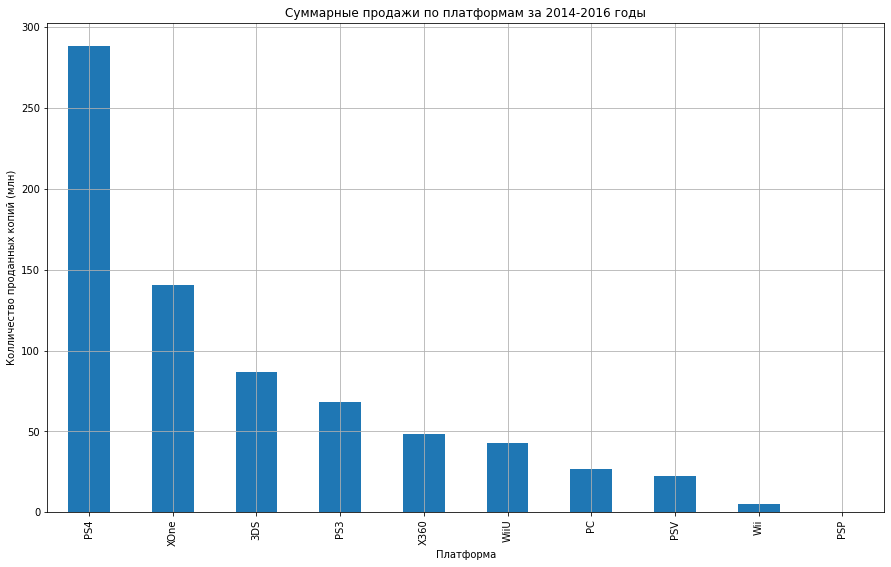

In [28]:
df_actual_platform = df_actual.groupby(['platform'])['sum_sales'].sum().sort_values(ascending=False)
df_actual_platform.plot(
    kind='bar', figsize=(15,9), grid=True,
    title='Суммарные продажи по платформам за 2014-2016 годы',
    xlabel= 'Платформа', ylabel= 'Колличество проданных копий (млн)'
)

Самые большие продажи с почти двухкратным отрывом имеет платформа Playstation 4. За ней идёт XBox one, Nintendo 3DS, Playstation 3 , XBox 360 и Nintendo Wii U. <br>
Далее посмотрим на каком этапе жизненного цикла находятся современные платформы. Продажи растут или падают. 

Распределение продаж игр за 2014-2016 годы на платформе: PS4


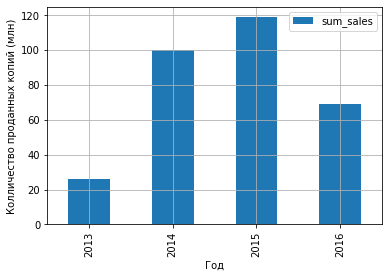

Распределение продаж игр за 2014-2016 годы на платформе: XOne


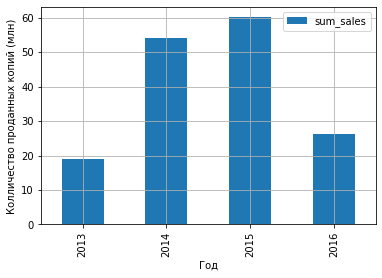

Распределение продаж игр за 2014-2016 годы на платформе: 3DS


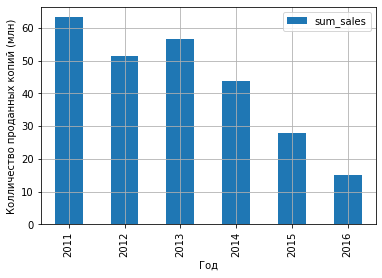

Распределение продаж игр за 2014-2016 годы на платформе: PS3


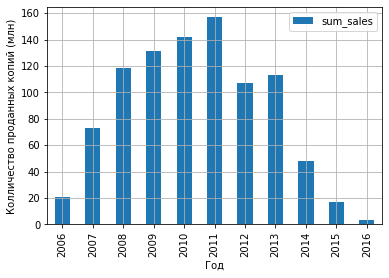

Распределение продаж игр за 2014-2016 годы на платформе: X360


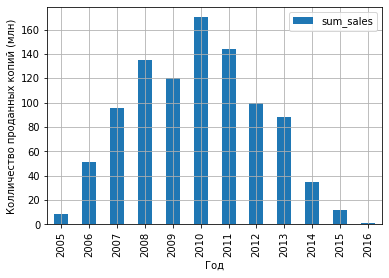

Распределение продаж игр за 2014-2016 годы на платформе: WiiU


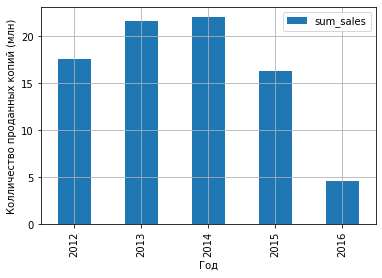

Распределение продаж игр за 2014-2016 годы на платформе: PC


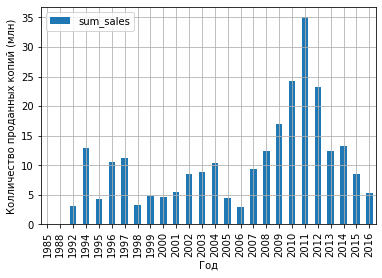

Распределение продаж игр за 2014-2016 годы на платформе: PSV


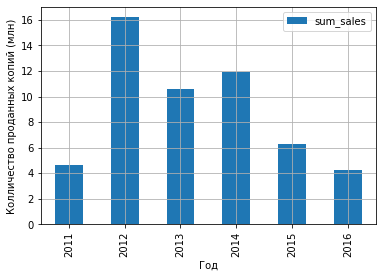

Распределение продаж игр за 2014-2016 годы на платформе: Wii


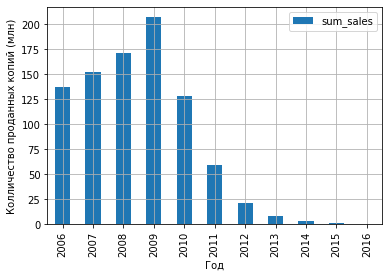

Распределение продаж игр за 2014-2016 годы на платформе: PSP


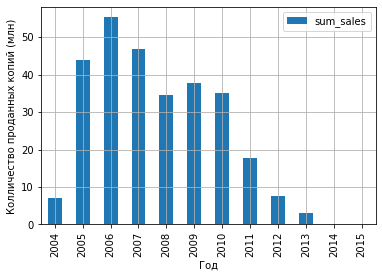

In [29]:
for i in df_actual_platform.index:
    print('Распределение продаж игр за 2014-2016 годы на платформе:', i)
    (df
     .query('platform == @i')
     .pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
     .plot(kind='bar', xlabel= 'Год', ylabel= 'Колличество проданных копий (млн)', grid=True)
    )
    plt.show()

Виден угасающий график на многих платформах. также мы раннее определили средний срок жизни платформ в 10 лет. Поэтому эти платформы нельзя назвать перспективными:
- Playstation 3
- XBox 360
- Nintendo 3DS
- Wii
- PSP
- 3DS

Платформы, достаточно молодые, но со снижающимся трендом продаж. Могут ещё 'выстрелить', они могут ещё быть перспективными в своей нише при условии выхода достаточного колличества качественных проектов:
- WiiU
- PSV

Перспективными платформами можно назвать:
- Playstation 4
- XBox One

Я бы отдельно выделил персональные компьютеры (PC), так как несмотря на длинную историю эта платформа имеет небольшие, но стабильные продажи. Причиной этому является постоянная модернизация железа компьютеров, поэтому они могут идти в ногу с современными игровыми тенденциями. Чего нет у приставок. В истории PC были всплески продаж и они не исключены в дальнейшем. Плюс есть целый пласт игр, в которые гораздо удобнее играть именно на PC, например, стратегии. Я бы не отнёс эту платформу к перспективным, но и к умирающим тоже относить не стоит..

### **Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

Создадим отдельный датафрейм из игр на платформах, которые можно назвать перспективными

In [30]:
actual_platform_new = df_actual.query('platform in ["PS4", "XOne", "WiiU", "PSV"]')
actual_platform_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call Of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,Fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,-1,7.98
92,Call Of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16427,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16431,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16435,Aiyoku No Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16440,Haitaka No Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01


[Text(0.5, 1.0, 'Продажи по перспективным платформам за 2014-2016 гг'),
 Text(0.5, 0, 'Платформы'),
 Text(0, 0.5, 'Общие продажи')]

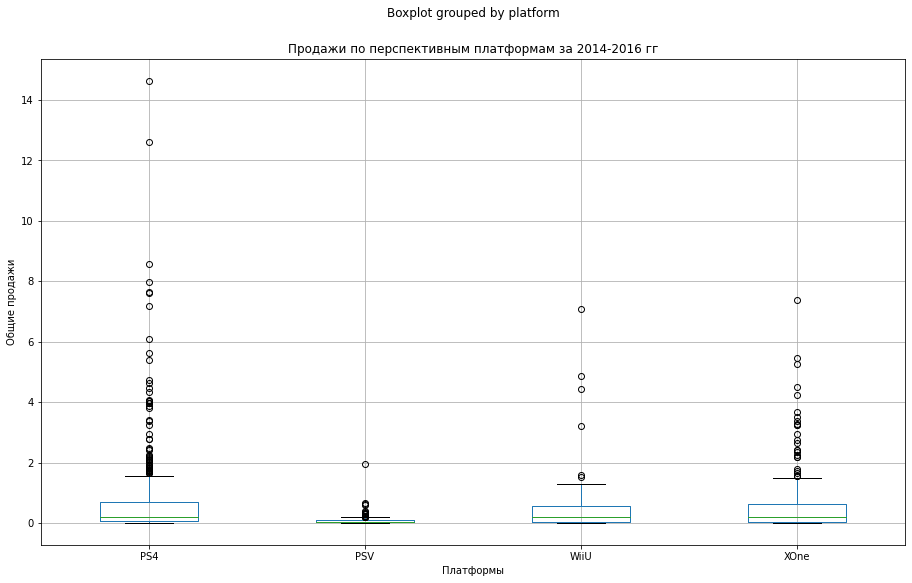

In [31]:
# построим график ящик с усами:
actual_platform_new.boxplot(column='sum_sales', by='platform', grid=True, figsize=(15,9)).set(title = 'Продажи по перспективным платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи')

[Text(0.5, 1.0, 'Продажи по перспективным платформам за 2014-2016 гг'),
 Text(0.5, 0, 'Платформы'),
 Text(0, 0.5, 'Общие продажи'),
 (0.0, 2.0)]

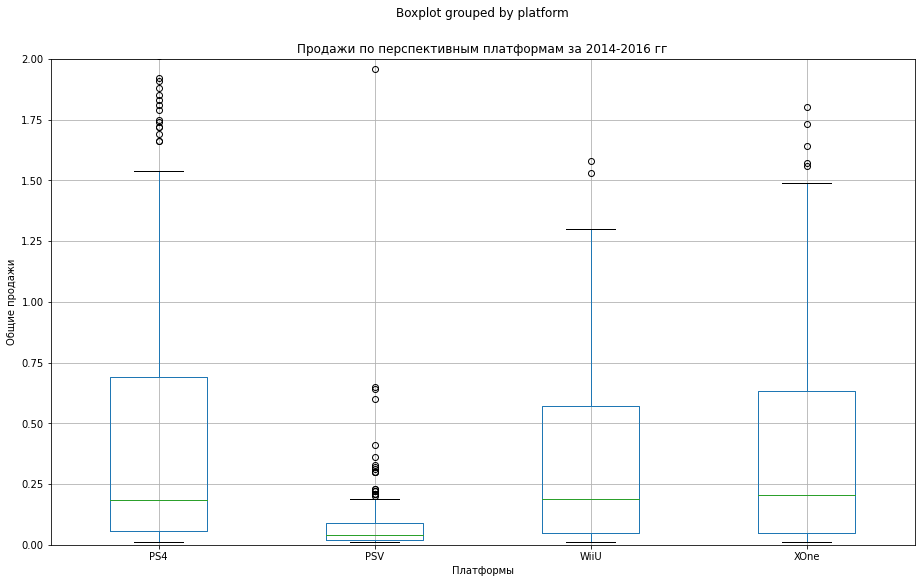

In [32]:
# ограничим значения по оси y
actual_platform_new.boxplot(column='sum_sales', by='platform', grid=True, figsize=(15,9)).set(title = 'Продажи по перспективным платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи',
         ylim=(0, 2)
)

In [33]:
actual_platform_new.groupby(['platform'])['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


У PS4, XBox One и Wii U медианное значение округленно в районе 0,2 млн (кроме платформы PSV - 0,04 млн). Также мы видим значения, сильно превышающие третий квантиль. Это игры с самыми большими продажами. Самое большое число таких игр у PS4 и Xbox One. У PS4 есть игра с продажами около 15 млн копий. У PSV значения гораздо более скромные и на основании этого графика следует исключить PSV из списка перспективных платформ. 

In [34]:
actual_platform_new = actual_platform_new.query('platform not in ["PSV"]')

### **Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

In [35]:
games = actual_platform_new.query('platform == "PS4" & critic_score != -1 & user_score != -1 ')

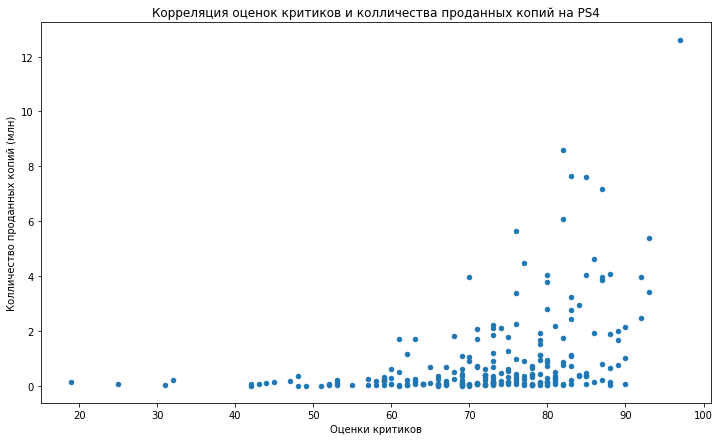

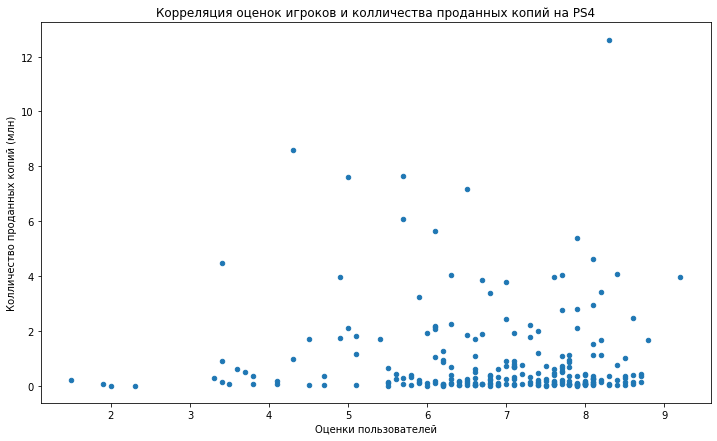

In [36]:
# построим графики корре
games.plot(
    kind='scatter', 
    x='critic_score', 
    y='sum_sales', 
    figsize = (12,7),
    title = 'Корреляция оценок критиков и колличества проданных копий на PS4',
    xlabel = 'Оценки критиков', 
    ylabel = 'Колличество проданных копий (млн)',
)
games.plot(
    kind='scatter', 
    x='user_score',
    y='sum_sales', 
    figsize = (12,7),
    title = 'Корреляция оценок игроков и колличества проданных копий на PS4',
    xlabel = 'Оценки пользователей', 
    ylabel = 'Колличество проданных копий (млн)'
)
plt.show()


In [37]:
print(games[['critic_score', 'user_score', 'sum_sales']].corr()['sum_sales'])

critic_score    0.401903
user_score     -0.043186
sum_sales       1.000000
Name: sum_sales, dtype: float64


Оценка критиков влияет на продажи игр, хоть и не очень сильно (коэффициент корреляции Пирсона - 0,4). Видно, что игры с высокими продажами имели и высокие рейтинги. <br>
А вот оценки игроков совсем не влияют на продажи. Коэффициент -0,04

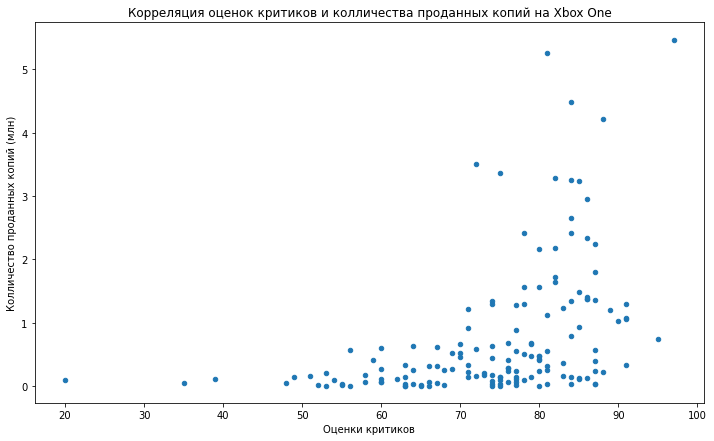

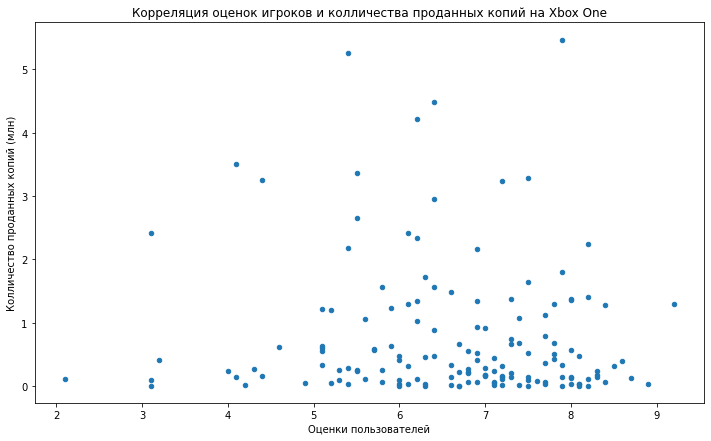

critic_score    0.422112
user_score     -0.091734
sum_sales       1.000000
Name: sum_sales, dtype: float64


In [38]:
games_XOne = actual_platform_new.query('platform == "XOne" & critic_score != -1 & user_score != -1 ')

games_XOne.plot(
    kind='scatter', 
    x='critic_score', 
    y='sum_sales', 
    figsize = (12,7),
    title = 'Корреляция оценок критиков и колличества проданных копий на Xbox One',
    xlabel = 'Оценки критиков', 
    ylabel = 'Колличество проданных копий (млн)',
)
games_XOne.plot(
    kind='scatter', 
    x='user_score',
    y='sum_sales', 
    figsize = (12,7),
    title = 'Корреляция оценок игроков и колличества проданных копий на Xbox One',
    xlabel = 'Оценки пользователей', 
    ylabel = 'Колличество проданных копий (млн)'
)
plt.show()

print(games_XOne[['critic_score', 'user_score', 'sum_sales']].corr()['sum_sales'])

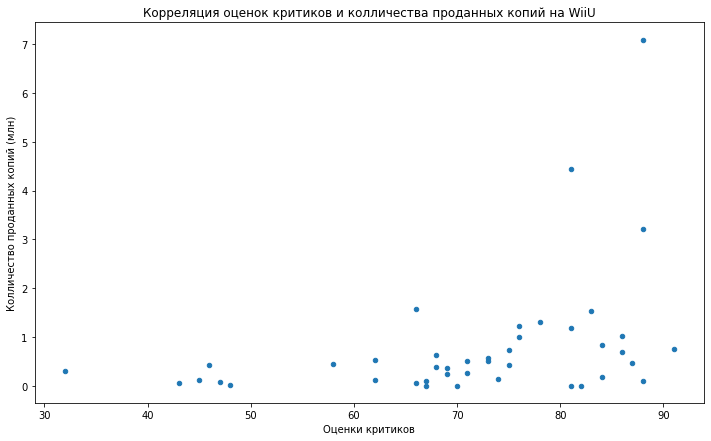

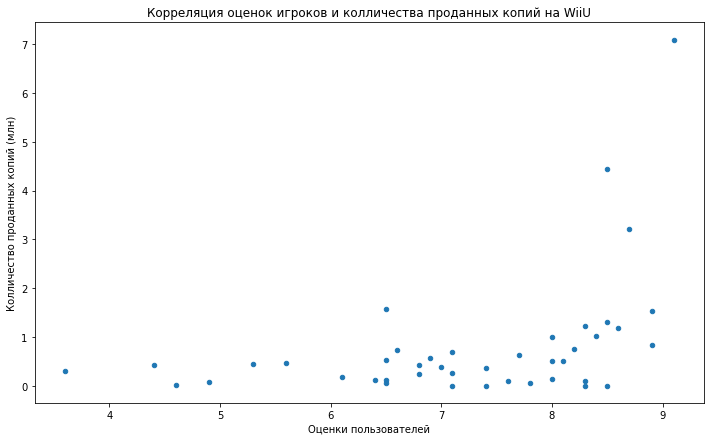

critic_score    0.375640
user_score      0.411451
sum_sales       1.000000
Name: sum_sales, dtype: float64


In [39]:
games_WiiU = actual_platform_new.query('platform == "WiiU" & critic_score != -1 & user_score != -1 ')

games_WiiU.plot(
    kind='scatter', 
    x='critic_score', 
    y='sum_sales', 
    figsize = (12,7),
    title = 'Корреляция оценок критиков и колличества проданных копий на WiiU',
    xlabel = 'Оценки критиков', 
    ylabel = 'Колличество проданных копий (млн)',
)
games_WiiU.plot(
    kind='scatter', 
    x='user_score',
    y='sum_sales', 
    figsize = (12,7),
    title = 'Корреляция оценок игроков и колличества проданных копий на WiiU',
    xlabel = 'Оценки пользователей', 
    ylabel = 'Колличество проданных копий (млн)'
)
plt.show()

print(games_WiiU[['critic_score', 'user_score', 'sum_sales']].corr()['sum_sales'])

 **Вывод** <br>
<br>
*Playstation 4:* Оценка критиков влияет на продажи игр, но взаимосвязь не очень сильная (коэффициент корреляции Пирсона - 0,4). Можно сказать, что чем выше оценки критиков, тем выше продажи.  <br>
Оценки игроков совсем не влияют на продажи. Коэффициент -0,04 
<br>
<br>
*Xbox One:* Коэффициент корреляции практически такой же, как у PS4, 0,42. Оценка критиков влияет на продажи, но не сильно. С ростом оценок растут и продажи. <br>
Оценки игроков совсем не влияют на продажи. Коэффициент -0,09
<br>
<br>
*WiiU*: Оценка критиков и пользователей примерно одинаково влияют на продажи игр, коэффициент около 0,4. С ростом оценок продажи также растут.

### **Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

Изучим как распределяются продажи по жанрам игр на платформах, которые мы определили, как перспективные

<AxesSubplot:title={'center':'Распределение игр по жанрам на перспективных платформах за 14-16 гг.'}, xlabel='Жанр', ylabel='Колличество проданных копий (млн)'>

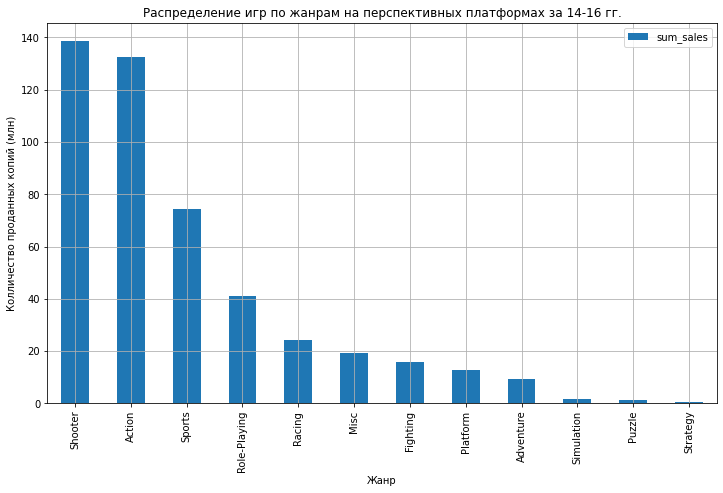

In [40]:
actual_platform_new.pivot_table(
    index='genre',
    values='sum_sales',
    aggfunc='sum'
).sort_values(
    by='sum_sales',
    ascending=False
).plot(kind='bar',
       title='Распределение игр по жанрам на перспективных платформах за 14-16 гг.',
       xlabel= 'Жанр',
       ylabel= 'Колличество проданных копий (млн)',
       grid=True,
       figsize=(12,7)
)

Среди актуальных и одновременно перспективных платформ самыми прибыльными жанрами можно назвать шутеры и экшены. <br>
<br>
**Топ жанров:** <br>
- Шутеры
- Экшн
- Спортивные игры
- Ролевые игры
- Гонки

<br>
Самые низкопродаваемые жанры:
<br>

- Симуляторы
- Пазлы
- Стратегии

[Text(0.5, 1.0, 'Распределение игр по жанрам на перспективных платформах за 14-16 гг.'),
 Text(0.5, 0, 'Жанры'),
 Text(0, 0.5, 'Общие продажи'),
 (0.0, 3.0)]

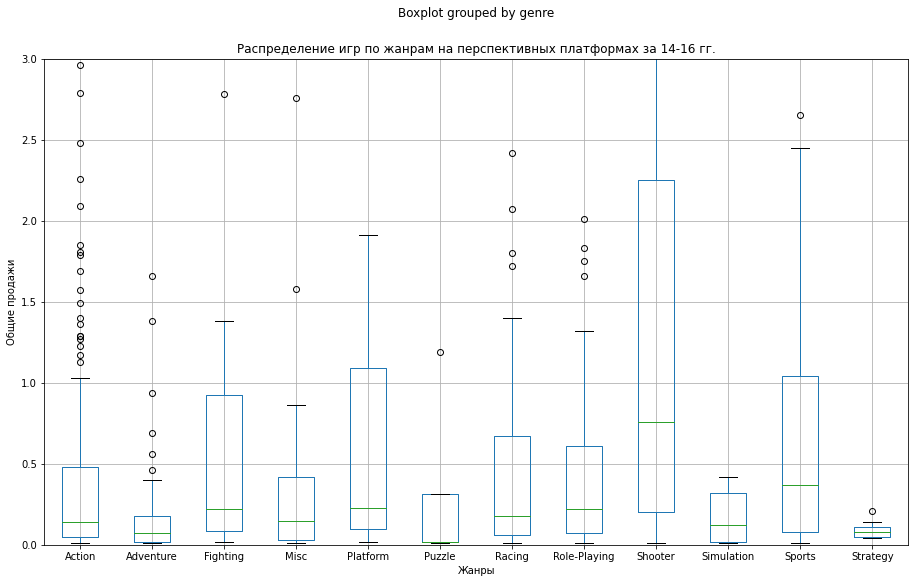

In [41]:
# построим график ящик с усами:
actual_platform_new.boxplot(
    column='sum_sales', 
    by='genre', 
    grid=True, 
    figsize=(15,9)).set(
    title = 'Распределение игр по жанрам на перспективных платформах за 14-16 гг.',
    xlabel = 'Жанры', 
    ylabel = 'Общие продажи', ylim=(0, 3)
)




**Вывод**<br>
Самый лучший жанр, имеющий хорошие продажи и самую высокую медиану - это шутеры. Также можно выделить спортивные игры, экшен, платформеры, драки, ролевые игры и гонки. Другие жанры имеют более низкие показатели. В жанре экшн выходило много "выстреливающих игр".

## Портрет пользователя каждого региона

### **Самые популярные платформы (топ-5)**

In [42]:
# список регионов
regions = ['na_sales', 'eu_sales', 'jp_sales']

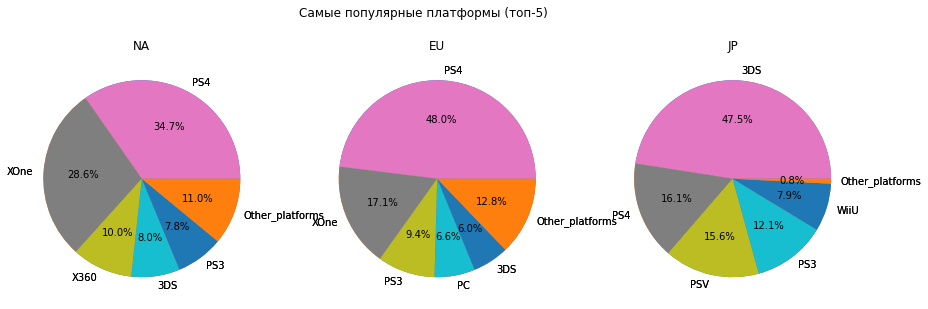

In [43]:
# круговая диаграмма для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Самые популярные платформы (топ-5)')
for i in range(3):
    df_i = (df_actual.groupby('platform')[regions[i]].sum().reset_index().sort_values(regions[i], ascending = False, ignore_index = True).head(5))
  # занесем все остальные продажи в Other_platforms
    df_i = df_i.append({'platform': 'Other_platforms', regions[i]: df_actual[regions[i]].sum() - df_i[regions[i]].sum()}, ignore_index= True)
    axs[i].pie(df_i[regions[i]], labels = df_i['platform'])
    axs[i].pie(df_i[regions[i]], labels = df_i['platform'], autopct='%1.1f%%')
# Зададим название региона.
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Вкусы жителей Северной Америки и Европы совпадают в том, что самая популярная платформа и там и там - PS4. На втором месте Xbox One. На 3ем месте в Северной Америке XBox 360, тогда как в Европе PS3. В Америке в целом можно увидеть большую популярность платформ от Xbox, чем в других регионах, возможно в связи с тем, что это для них родной рынок.<br>
Рынок Японии сильно отличается от остальных, здесь на первом плане стоит Nintendo 3DS. Также вероятно причина успеха в том, что на родном рынке они активнее себя продвигают.На втором месте PS4 и далее PSV. Уникальность Японского рынка в том, что более 70% продаж это игры на мобильных игровых платформах.

### **Самые популярные жанры (топ-5)**

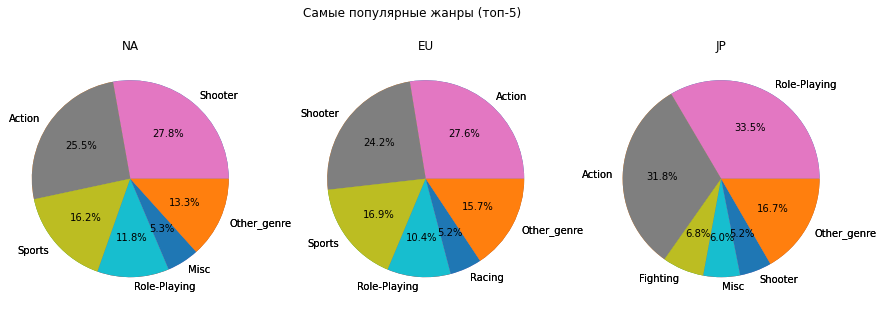

In [44]:
# круговая диаграмма для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Самые популярные жанры (топ-5)')
for i in range(3):
  # 5 самых продающих жанров
  df_i = (df_actual.groupby('genre')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_genre
  df_i = df_i.append({'genre': 'Other_genre', regions[i]: df_actual[regions[i]].sum() - df_i[regions[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[regions[i]], labels = df_i['genre'])
  axs[i].pie(df_i[regions[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Северная Америка и Европа очень похожи во вкусах к жанрам, более 50% и там и там занимают игры Экшн и Шутеры, только в Америке Шутеры на первом месте, а в Европе - Экшены, на третьем месте и там и там идут спортивные игры. <br>
Японские геймеры больше всего любят ролевые игры, за ними идут игры в жанре экшен, на третьем месте с сильным отставанием драки. 

### **Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

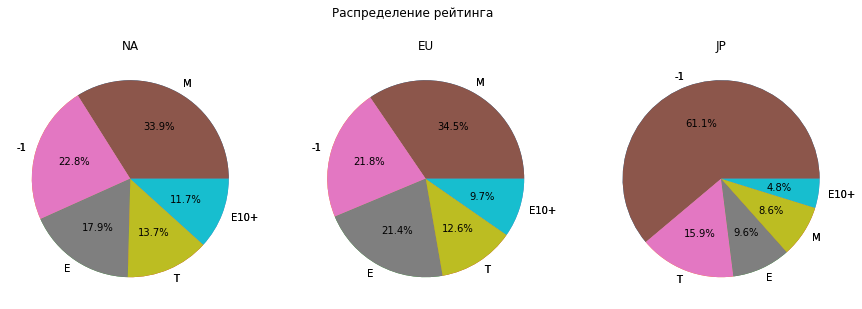

In [45]:
# круговая диаграмма для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Распределение рейтинга')
for i in range(3):
  # влияние рейтинга
  df_i = (df_actual.groupby('rating')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True).
             head(5))
  axs[i].pie(df_i[regions[i]], labels = df_i['rating'])
  axs[i].pie(df_i[regions[i]], labels = df_i['rating'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Нельзя сказать, что рейтинг ESRB влияет на продажи игр. На рынках Америки и Европы большую часть игр по продажам занимают игры с рейтингом М (Mature) — для взрослой аудитории от 17 лет и старше, то есть несмотря на сильные ограничения по возрасту эти игры всё равно в топе. <br>
В Японии более 60% покупаемых игр не имеют рейтинга ESRB. ESRB это Американская компания, которая присваивает рейтинг играм, продающимся в Америке. Поэтому можно предположить, что большую популярность в Японии имеют уникальные, местные, нишевые игры, не доходящие до американского рынка. 15% продаж - это подростковые игры (T), на третьем месте игры для всех возрастов (Е)

**Портрет американского геймера:** <br>
Играет в Playstation 4<br>
Играет в шутеры<br>
Играет в игры с рейтингом М (Mature) — для взрослой аудитории от 17 лет и старше;<br>
<br>

**Портрет европейского геймера:**<br>
Играет в Playstation 4<br>
Играет в игры жанра экшн<br>
Играет в игры с рейтингом М (Mature) — для взрослой аудитории от 17 лет и старше;<br>
<br>
**Портрет японского геймера:**<br>
Играет в 3DS<br>
Играет в ролевые игры<br>
Играет в игры местного производства

## ВЫВОД

**На этапе предобработки:**
- Мы проверили датафрейм на дубликаты. Полных дубликатов нет. 
- Все названия столбцов привели к одинаковому виду с нижней строки
- Нашли пропуски в столбцах. Строки с пропусками в 'name', 'year_of_release', 'genre' были удалены. 
- Пропущенные значения в critic_score, user_score и rating были заменены на '-1' для возможности дальнейшего анализа
- Всего была потеряна 272 строки, это менее 1 процента от всего датафреймма. Этот результат нас устраивает.
- Тип данных в столбце year_of_release был заменён на int64, так как года - это целочисленные значения. 
- Тип данных в столбце user_score был заменён на float, так как оценки имеют десятичные значения. 
- В столбце rating заменили все значения 'K-A' на 'E10+', так как это одно и тоже, но в современной версии рейтинга. 
- Был добавлен столбец sum_sales с суммарными продажами по всем регионам

**Исследовательский анализ**

Количество выпущенных игр росло, начиная с 1990 года и по 2008 год. <br>
С 1980 по 2016 в среднем каждый год выпускалось около 444 игр. <br> 
Во внимание мы взяли среднее медианное в связи с большим разбросом данных по годам. <br>
Самым урожайным на игры годом был 2008 с 1427 играми. <br> 
После этого пика началось планомерное снижение колличества выпускаемых игр. <br>
Возможно повышение требовательности геймеров к качественным играм повысило бюджеты игр и время на их разработку, что отразилось на колличестве выпускаемых студиями игр.

**Можно выделить топ платформ по продажам игр:**<br><br>
Будем считать годами с топ продажами при количестве проданных копий свыше 100 млн. <br>
- PlayStation 2 (топ продаж с 2001 по 2006 год)
- Xbox360 (топ продаж с 2008 по 2012 год)
- PlayStation 3 (топ продаж с 2008 по 2013 год)
- Wii Nintendo (топ продаж с 2006 по 2010 год)
- Nintendo DS (топ продаж с 2005 по 2009 год)
- PlayStation (топ продаж с 1997 по 1999 год)
<br>

Наибольшее количество продаж было у игр для PS2. В момент выхода первых игр в 2000 году это был прорыв в игровых технологиях, люди с охотой покупали новые приставки и игры к ним. <br>
У каждой из платформ можно заметить жизненный цикл, в виде резкого взлёта продаж игр, далее более плавный рост или удержание прежних уровней на протяжении от 2 до 5 лет и затем спад продаж до нулевого уровня. В среднем срок жизни у всех этих платформ около 10 лет. Причём все 6 платформ-лидеров продаж уже не являются актуальными. <br>

**Эти платформы нельзя назвать перспективными:**
- Playstation 3
- XBox 360
- Nintendo 3DS
- Wii
- PSP
- 3DS


**Перспективными платформами можно назвать:**
- Playstation 4
- XBox One
- WiiU

У PS4, XBox One и Wii U медианное значение проданных игр округленно в районе 0,2 млн. Также мы видим значения, сильно превышающие третий квантиль. Это игры с самыми большими продажами. Самое большое число таких игр у PS4 и Xbox One. У PS4 есть игра с продажами около 15 млн копий. У PSV значения гораздо более скромные.<br>

Среди актуальных и одновременно перспективных платформ самыми прибыльными жанрами можно назвать шутеры и экшены. <br>
<br>
**Влияние оценок критиков на продажи по платформам:**<br>
*Playstation 4:* Оценка критиков влияет на продажи игр, но взаимосвязь не очень сильная (коэффициент корреляции Пирсона - 0,4). Можно сказать, что чем выше оценки критиков, тем выше продажи.  <br>
Оценки игроков совсем не влияют на продажи. Коэффициент -0,04 
<br>
<br>
*Xbox One:* Коэффициент корреляции практически такой же, как у PS4, 0,42. Оценка критиков влияет на продажи, но не сильно. С ростом оценок растут и продажи. <br>
Оценки игроков совсем не влияют на продажи. Коэффициент -0,09
<br>
<br>
*WiiU*: Оценка критиков и пользователей примерно одинаково влияют на продажи игр, коэффициент около 0,4. С ростом оценок продажи также растут.<br>
<br>
**Топ жанров:** <br>
- Шутеры
- Экшн
- Спортивные игры
- Ролевые игры
- Гонки

<br>
Самые низкопродаваемые жанры:
<br>

- Симуляторы
- Пазлы
- Стратегии<br>

<br>Самый лучший жанр, имеющий хорошие продажи и самую высокую медиану - это шутеры. Также можно выделить спортивные игры, экшен, платформеры, драки, ролевые игры и гонки. Другие жанры имеют более низкие показатели. В жанре экшн выходило много "выстреливающих игр".<br>

**Портрет американского геймера:** <br>
Играет в Playstation 4<br>
Играет в шутеры<br>
Играет в игры с рейтингом М (Mature) — для взрослой аудитории от 17 лет и старше;<br>
<br>

**Портрет европейского геймера:**<br>
Играет в Playstation 4<br>
Играет в игры жанра экшн<br>
Играет в игры с рейтингом М (Mature) — для взрослой аудитории от 17 лет и старше;<br>
<br>
**Портрет японского геймера:**<br>
Играет в 3DS<br>
Играет в ролевые игры<br>
Играет в игры местного производства

Не отвергаем гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Отвергаем гипотезу, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Рекомендации:

Данное исследование даёт возможность сделать следующие рекомендации: <br>
   - акцентировать продажи игр на платформе PS4, но также не забывать про XBox One и Wii U, так как они тоже перспективны.
   - по жанрам выбирать в первую очередь игры жанра экшен и шутеры, а также спортивные игры. 
   - не бояться высокого рейтинга М от ESRB, а считать его признаком потенциального успеха.
    
    